#### Test whether a transverse force arises in a pair of torqued dumbbells interacting across a fixed distance.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
import sys
sys.path.append('../lib/')
import simulator
rc('animation', html='html5') ## So we can show animations inline (as a repr)

In [2]:
def animate_trajectory(traj, nevery=10, interval=20):
    def update(frame):
        scat.set_offsets(frame)
    fig, ax = plt.subplots(figsize=(5,5))
    ax.axis('off')  # Turn off ugly border
    ax.set_xlim(-2,6)
    ax.set_ylim(-4,4)
    scat = ax.scatter(*traj[0].T, s=200)
    ani = animation.FuncAnimation(
        fig, update, traj[::nevery], blit=False, interval=interval)
    return ani

#### Start with a simulation using regular velocity verlet for a pair of CCW torqued dumbbells

In [3]:
pos = np.array([
        [1,0],
        [2,0],
        [4,1.5],
        [4,.5]])
sim = simulator.Simulator(pos, .01, 1.0)

traj = []
for t in range(1500):
    traj.append(sim.pos)
    sim.velocity_verlet_timestep()

In [4]:
ani = animate_trajectory(traj)
ani

#### Now use the rotational velocity verlet integrator. We see that dumbbell centers of mass are fixed, but rotations accelerate since there is no Langevin bath. As they do so the bond length increases, due to the increasing centrifugal force.

In [5]:
pos = np.array([
        [1,0],
        [2,0],
        [4,1.5],
        [4,.5]])
sim = simulator.Simulator(pos, .01, 1.0)

traj = []
for t in range(1500):
    traj.append(sim.pos)
    sim.vv_constrained()

ani = animate_trajectory(traj, 1)
ani    

In [11]:
pos = np.array([
        [1,0],
        [2,0],
        [4,-.5],
        [4,.5]])
sim = simulator.Simulator(pos, .05, .01)

traj = []
f_com_constraint = []
for t in range(5000): # Equilibration
    sim.vv_constrained(2.0, 0.01)
for t in range(30000): # Production
    traj.append(sim.pos)
    f_com_constraint.append(sim.vv_constrained(2.0, 0.01))  # Tally the force to keep dumbbell COM fixed

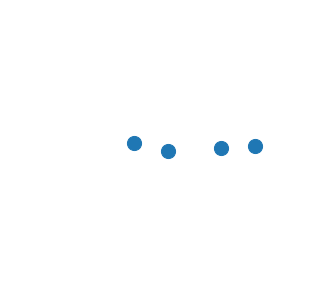

In [12]:
ani = animate_trajectory(traj[-1000:],2)
ani    

In [13]:
%matplotlib inline

In [14]:
f_com_constraint = np.array(f_com_constraint)
f_com_constraint.mean(axis=0)

array([-0.97350411,  0.00829176])

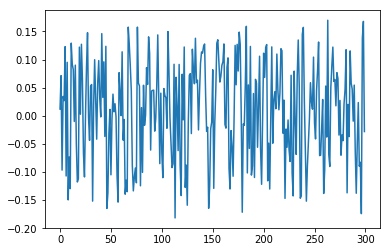

In [16]:
fig, ax = plt.subplots()
ax.plot(f_com_constraint[::100,1])

Text(0,0.5,'$\\langle F \\rangle $')

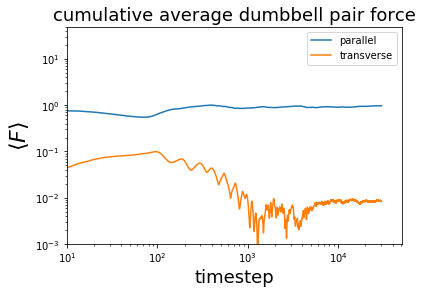

In [17]:
parallel = np.cumsum(f_com_constraint[1:,0]) / np.arange(1, len(f_com_constraint))
transverse = np.cumsum(f_com_constraint[1:,1]) / np.arange(1, len(f_com_constraint))
fig, ax = plt.subplots()
ax.plot(np.abs(parallel),label='parallel')
ax.plot(np.abs(transverse),label='transverse')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(1e1)
ax.set_ylim(1e-3, 5e1)
ax.legend()
ax.set_title('cumulative average dumbbell pair force', fontsize=18)
ax.set_xlabel('timestep', fontsize=18)
ax.set_ylabel(r'$\langle F \rangle $', fontsize=22)